In [ ]:
! pip install transformers datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 14.4 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
from datasets import load_dataset
from transformers import pipeline
import pandas as pd

# Load the dataset
ds = load_dataset("McAuley-Lab/Amazon-Reviews-2023", "raw_review_Video_Games", trust_remote_code=True)

# Show the first few rows of the dataset (optional, just for preview)
ds["full"][0]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/19.7k [00:00<?, ?B/s]

Amazon-Reviews-2023.py:   0%|          | 0.00/39.6k [00:00<?, ?B/s]

Video_Games.jsonl:   0%|          | 0.00/2.68G [00:00<?, ?B/s]

Generating full split: 0 examples [00:00, ? examples/s]

{'rating': 4.0,
 'title': 'It’s pretty sexual. Not my fav',
 'text': 'I’m playing on ps5 and it’s interesting.  It’s unique, massive, and has a neat story.  People are freaking out angry about this game.  I don’t think it’s a top 10 game but it’s definitely a good game on ps5 (played at launch).',
 'images': [],
 'asin': 'B07DJWBYKP',
 'parent_asin': 'B07DK1H3H5',
 'user_id': 'AGCI7FAH4GL5FI65HYLKWTMFZ2CQ',
 'timestamp': 1608186804795,
 'helpful_vote': 0,
 'verified_purchase': True}

In [ ]:
# Load sentiment analysis pipeline
sentiment_analyzer = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

## Preprocess the Texts

In [ ]:
# taking a fraction of the dataset
ds_new = ds['full'].shuffle(seed=42).select(range(100))

# Example of text preprocessing
def preprocess_text(text):
    # Lowercasing and other preprocessing if needed
    text = text.lower()  # Convert to lowercase
    return text

# Apply preprocessing to the dataset (if needed)
# Change to ds_new if you only want to work on the subset, otherwise leave it as ds['full']
dataset = ds_new.map(lambda x: {'text': preprocess_text(x['text'])})
dataset

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Dataset({
    features: ['rating', 'title', 'text', 'images', 'asin', 'parent_asin', 'user_id', 'timestamp', 'helpful_vote', 'verified_purchase'],
    num_rows: 100
})

In [ ]:
# Take a smaller sample of the dataset
sample_ds = dataset[0:100]
sample_ds

{'rating': [2.0,
  5.0,
  5.0,
  1.0,
  5.0,
  5.0,
  5.0,
  1.0,
  5.0,
  4.0,
  5.0,
  4.0,
  5.0,
  5.0,
  5.0,
  5.0,
  5.0,
  5.0,
  5.0,
  1.0,
  4.0,
  4.0,
  3.0,
  5.0,
  5.0,
  5.0,
  5.0,
  2.0,
  5.0,
  5.0,
  5.0,
  2.0,
  5.0,
  5.0,
  5.0,
  5.0,
  5.0,
  1.0,
  5.0,
  3.0,
  4.0,
  5.0,
  5.0,
  5.0,
  5.0,
  5.0,
  5.0,
  5.0,
  5.0,
  5.0,
  2.0,
  5.0,
  5.0,
  5.0,
  1.0,
  5.0,
  5.0,
  1.0,
  2.0,
  5.0,
  5.0,
  5.0,
  5.0,
  5.0,
  5.0,
  5.0,
  5.0,
  5.0,
  5.0,
  4.0,
  1.0,
  5.0,
  5.0,
  5.0,
  5.0,
  5.0,
  3.0,
  4.0,
  4.0,
  5.0,
  5.0,
  2.0,
  5.0,
  3.0,
  5.0,
  5.0,
  5.0,
  1.0,
  5.0,
  4.0,
  3.0,
  5.0,
  5.0,
  5.0,
  2.0,
  2.0,
  5.0,
  5.0,
  4.0,
  5.0],
 'title': ['Most don’t fit',
  'Five Stars',
  'Classic',
  'Stopped working in a week!',
  'This best wushu martial art game ever , i love it',
  'Five Stars',
  'Great buy!',
  'Broke after about 5-minutes of use',
  'Such a great gift for a switch fan!',
  'Great pad but has writing on

In [ ]:
# Perform sentiment analysis on the sample
results = sentiment_analyzer(sample_ds["text"], truncation=True)
results

[{'label': 'NEGATIVE', 'score': 0.9995306730270386},
 {'label': 'POSITIVE', 'score': 0.9998799562454224},
 {'label': 'POSITIVE', 'score': 0.9997201561927795},
 {'label': 'NEGATIVE', 'score': 0.999054491519928},
 {'label': 'POSITIVE', 'score': 0.9993396401405334},
 {'label': 'POSITIVE', 'score': 0.9998588562011719},
 {'label': 'POSITIVE', 'score': 0.9998407363891602},
 {'label': 'NEGATIVE', 'score': 0.9987261891365051},
 {'label': 'POSITIVE', 'score': 0.9998717308044434},
 {'label': 'POSITIVE', 'score': 0.7401615977287292},
 {'label': 'POSITIVE', 'score': 0.9998217225074768},
 {'label': 'POSITIVE', 'score': 0.9998565912246704},
 {'label': 'POSITIVE', 'score': 0.9997816681861877},
 {'label': 'POSITIVE', 'score': 0.9998753070831299},
 {'label': 'POSITIVE', 'score': 0.9716775417327881},
 {'label': 'POSITIVE', 'score': 0.9996309280395508},
 {'label': 'POSITIVE', 'score': 0.9998774528503418},
 {'label': 'POSITIVE', 'score': 0.9993404746055603},
 {'label': 'POSITIVE', 'score': 0.9995322227478

## Evaluate the Performance Model

In [ ]:
# Assuming the dataset has a 'rating' column with the true sentiment labels
true_labels = sample_ds['rating']  # Actual labels

# Convert the true labels to match the model's label format (e.g., 0 = 'NEGATIVE', 1 = 'POSITIVE')
true_labels_mapped = ['POSITIVE' if rating > 3 else 'NEGATIVE' if rating < 2 else 'NEUTRAL' for rating in true_labels]

# Predicted labels, ensure they are in the same format ('POSITIVE', 'NEGATIVE')
predicted_labels = [result['label'] for result in results]

# Create a DataFrame to compare true and predicted labels
comparison_df = pd.DataFrame({
    'True Label': true_labels_mapped,
    'Predicted Label': predicted_labels,
    'Confidence Score': [result['score'] for result in results]
})
comparison_df

,True Label,Predicted Label,Confidence Score
0,NEUTRAL,NEGATIVE,0.999531
1,POSITIVE,POSITIVE,0.999880
2,POSITIVE,POSITIVE,0.999720
3,NEGATIVE,NEGATIVE,0.999054
4,POSITIVE,POSITIVE,0.999340
...,...,...,...
95,NEUTRAL,NEGATIVE,0.999633
96,POSITIVE,POSITIVE,0.924413
97,POSITIVE,POSITIVE,0.998813
98,POSITIVE,POSITIVE,0.999193


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
# Calculate accuracy
accuracy = accuracy_score(true_labels_mapped, predicted_labels)
f"Accuracy: {accuracy * 100:.2f}%"

'Accuracy: 76.00%'

In [ ]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(true_labels_mapped, predicted_labels, labels=['POSITIVE', 'NEGATIVE'])
conf_matrix

array([[68, 11],
       [ 0,  8]])

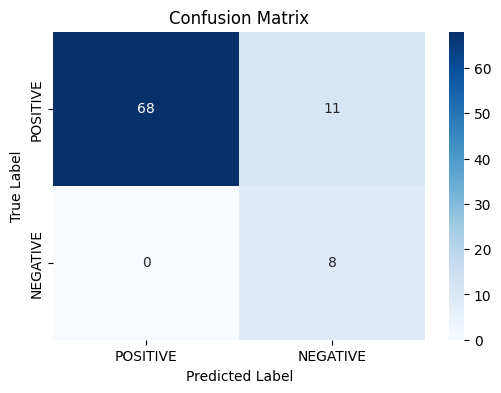

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['POSITIVE', 'NEGATIVE'], yticklabels=['POSITIVE', 'NEGATIVE'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
